<a href="https://colab.research.google.com/github/RiShiKaRoRa22/AI_LAB/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

data = [
    ("A", "B", 5), ("A", "C", 3), ("A", "D", 2),
    ("B", "C", 4), ("B", "E", 6), ("B", "F", 1),
    ("C", "D", 7), ("C", "F", 3), ("C", "G", 4),
    ("D", "G", 5), ("D", "H", 2),
    ("E", "F", 4), ("E", "I", 6),
    ("F", "G", 2), ("F", "I", 3),
    ("G", "H", 4), ("G", "J", 5),
    ("H", "J", 6),
    ("I", "J", 4),
    ("A", "E", 1), ("B", "D", 2),
    ("C", "E", 3), ("D", "F", 4),
    ("E", "G", 2), ("H", "I", 5)
]

df = pd.DataFrame(data, columns=["User1", "User2", "Weight"])
df.to_csv("social_network.csv", index=False)

df.head(10)


,User1,User2,Weight
0,A,B,5
1,A,C,3
2,A,D,2
3,B,C,4
4,B,E,6
5,B,F,1
6,C,D,7
7,C,F,3
8,C,G,4
9,D,G,5


In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


df = pd.read_csv("social_network.csv")

G = nx.Graph()

for _, row in df.iterrows():
    G.add_edge(row["User1"], row["User2"], weight=row["Weight"])

print("Nodes:", G.nodes())
print("Edges with weights:", G.edges(data=True))


Nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
Edges with weights: [('A', 'B', {'weight': 5}), ('A', 'C', {'weight': 3}), ('A', 'D', {'weight': 2}), ('A', 'E', {'weight': 1}), ('B', 'C', {'weight': 4}), ('B', 'E', {'weight': 6}), ('B', 'F', {'weight': 1}), ('B', 'D', {'weight': 2}), ('C', 'D', {'weight': 7}), ('C', 'F', {'weight': 3}), ('C', 'G', {'weight': 4}), ('C', 'E', {'weight': 3}), ('D', 'G', {'weight': 5}), ('D', 'H', {'weight': 2}), ('D', 'F', {'weight': 4}), ('E', 'F', {'weight': 4}), ('E', 'I', {'weight': 6}), ('E', 'G', {'weight': 2}), ('F', 'G', {'weight': 2}), ('F', 'I', {'weight': 3}), ('G', 'H', {'weight': 4}), ('G', 'J', {'weight': 5}), ('H', 'J', {'weight': 6}), ('H', 'I', {'weight': 5}), ('I', 'J', {'weight': 4})]


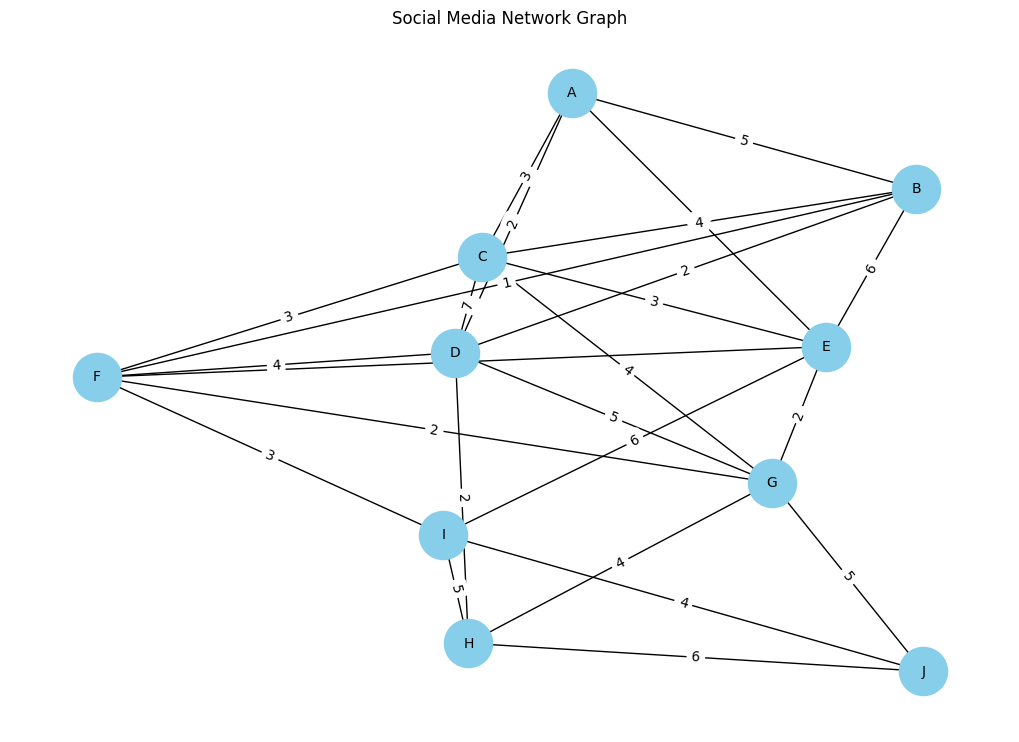

In [4]:
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G, pos,
    with_labels=True,
    node_color="skyblue",
    node_size=1200,
    font_size=10
)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Social Media Network Graph")
plt.show()


In [5]:
from collections import deque

def bfs_networkx(G, start):
    visited = set()
    queue = deque([start])
    order = []

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            order.append(node)
            queue.extend(n for n in G.neighbors(node) if n not in visited)

    return order

bfs_networkx(G, "A")


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [8]:
def bfs_traversal(G, start):
    visited = set()
    queue = deque([start])
    order = []

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            order.append(node)
            queue.extend(n for n in G.neighbors(node) if n not in visited)

    return order

bfs_traversal(G, "A")


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [7]:
def bfs_friend_recommendation(G, user):
    visited = {user}
    queue = deque([(user, 0)])
    direct = set(G.neighbors(user))
    recommendations = set()

    while queue:
        node, level = queue.popleft()
        if level == 2 and node not in direct and node != user:
            recommendations.add(node)

        if level < 2:
            for n in G.neighbors(node):
                if n not in visited:
                    visited.add(n)
                    queue.append((n, level + 1))

    return list(recommendations)

bfs_friend_recommendation(G, "A")


['H', 'I', 'G', 'F']

In [9]:
nx.shortest_path(G, source="A", target="J")


['A', 'C', 'G', 'J']

In [11]:
import heapq
def best_first_search(G, start):
    visited = set()
    pq = [(-999, start)]
    order = []

    while pq:
        _, node = heapq.heappop(pq)
        if node not in visited:
            visited.add(node)
            order.append(node)

            for n in G.neighbors(node):
                if n not in visited:
                    w = G[node][n]["weight"]
                    heapq.heappush(pq, (-w, n))
    return order

best_first_search(G, "A")


['A', 'B', 'E', 'I', 'H', 'J', 'G', 'D', 'C', 'F']

In [12]:
def best_first_recommendation(G, user):
    pq = []
    visited = {user}
    rec = []

    for n in G.neighbors(user):
        heapq.heappush(pq, (-G[user][n]["weight"], n))

    while pq:
        _, node = heapq.heappop(pq)
        if node not in visited:
            visited.add(node)
            rec.append(node)

    return rec[:5]

best_first_recommendation(G, "A")


['B', 'C', 'D', 'E']

In [13]:
print("BFS Order:", bfs_traversal(G, "A"))
print("Best-First Order:", best_first_search(G, "A"))


BFS Order: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
Best-First Order: ['A', 'B', 'E', 'I', 'H', 'J', 'G', 'D', 'C', 'F']


In [14]:
print("BFS Shortest Path A → J:")
print(nx.shortest_path(G, "A", "J"))

print("\nBest-First Traversal from A:")
print(best_first_search(G, "A"))


BFS Shortest Path A → J:
['A', 'C', 'G', 'J']

Best-First Traversal from A:
['A', 'B', 'E', 'I', 'H', 'J', 'G', 'D', 'C', 'F']


In [15]:
src = input("Enter source user: ")
dst = input("Enter destination user: ")

print("BFS Path:", nx.shortest_path(G, src, dst))
print("Best-First Traversal:", best_first_search(G, src))


Enter source user: A
Enter destination user: C
BFS Path: ['A', 'C']
Best-First Traversal: ['A', 'B', 'E', 'I', 'H', 'J', 'G', 'D', 'C', 'F']


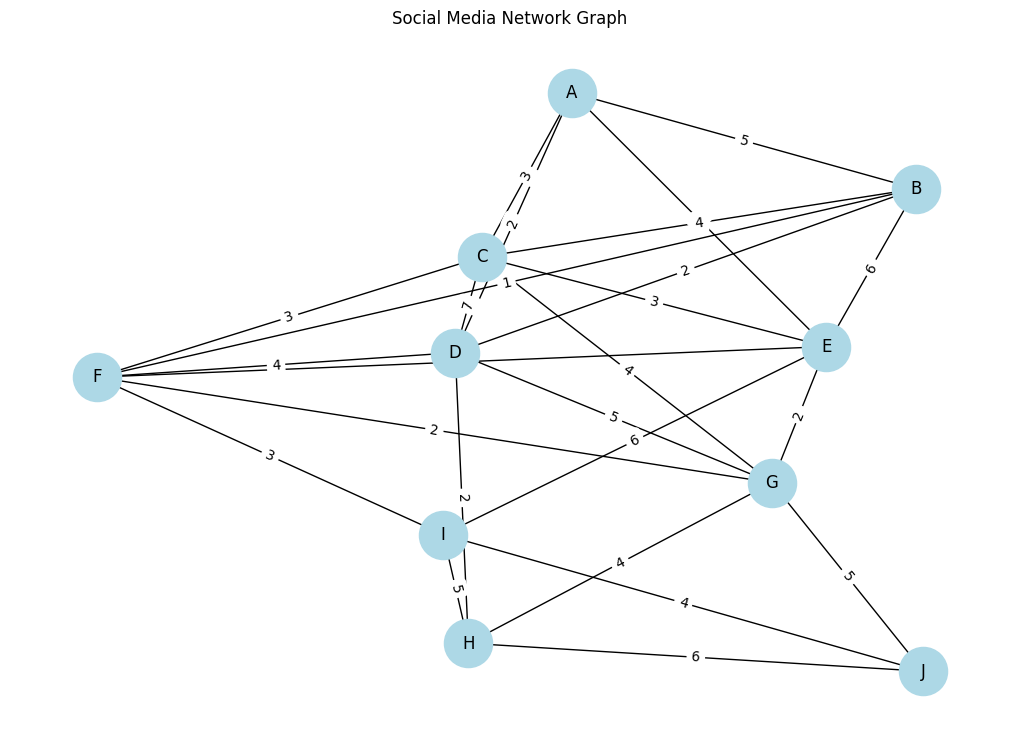

In [16]:
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10,7))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1200)
nx.draw_networkx_edge_labels(G, pos,
    edge_labels=nx.get_edge_attributes(G, "weight"))
plt.title("Social Media Network Graph")
plt.show()


In [17]:
if nx.has_path(G, src, dst):
    print("Connection exists:", nx.shortest_path(G, src, dst))
else:
    print("No connection exists")


Connection exists: ['A', 'C']


In [18]:
def influencers(G):
    scores = {}
    for node in G.nodes():
        scores[node] = len(bfs_traversal(G, node))
    return sorted(scores.items(), key=lambda x: x[1], reverse=True)

influencers(G)[:3]


[('A', 10), ('B', 10), ('C', 10)]

In [19]:
def two_level_users(G, user):
    visited = {user}
    queue = deque([(user, 0)])
    result = []

    while queue:
        node, level = queue.popleft()
        if level > 2:
            continue
        if node != user:
            result.append(node)

        for n in G.neighbors(node):
            if n not in visited:
                visited.add(n)
                queue.append((n, level + 1))
    return result

two_level_users(G, "A")


['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']